In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# fixing and cleaning data
data = data[data['Handcap'] <= 1]
data = data[data['Age'] >= 0]
data['No-show'] = data['No-show'].map({'Yes':1 , 'No':0})
data.nunique()

PatientId          62190
AppointmentID     110327
Gender                 2
ScheduledDay      103368
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_received           2
No-show                2
dtype: int64

In [6]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Creating a matched pair design A\B test

In [7]:
# supposing that receiving a SMS will be the treatment which we will apply to the experimental group
# spliting data into 2 groups ( SMS receciveed & NO_SMS_received ) 
# then removing duplicates ( for 6 control variables ) for each group
# the target varible here will be to decrease the NO-show = 1 .
data_SMS_received = data[data['SMS_received']==1].drop_duplicates(subset=['Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap'] )
data_No_SMS_received = data[data['SMS_received']==0].drop_duplicates(subset=['Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap'] )
print(data_SMS_received.shape)
print(data_No_SMS_received.shape)

(846, 14)
(986, 14)


In [8]:
# making sure that we have only one observation for each patientid in each group
data_SMS_received = data_SMS_received.drop_duplicates(subset=['PatientId'])
data_No_SMS_received = data_No_SMS_received.drop_duplicates(subset=['PatientId'])
print(data_SMS_received.shape)
print(data_No_SMS_received.shape)

(846, 14)
(986, 14)


In [9]:
# concatenating the 2 groups
data_ = pd.concat([data_SMS_received,data_No_SMS_received])
data_ = data_.drop_duplicates(subset=['PatientId'])
print(data_.shape)

(1680, 14)


In [10]:
# making matched pair groups ( for the 6 control variables )
# 1 group received a SMS & the other did not 
data_ = data_[(data_.duplicated(subset=['Neighbourhood','Scholarship','Hipertension','Diabetes',
                                        'Alcoholism','Handcap'],keep = False)) == True ]
print(data_[data_['SMS_received'] == 0 ].shape)
print(data_[data_['SMS_received'] == 1 ].shape)

(628, 14)
(628, 14)


#### we will use bootstrapping technique , thus we will have imbalanced samples for making groups
#### so we will use the percent of No-show for each groups as our target variable 
#### this percent is same like CTR ( click through rate ) for websites feature testing.  

### the null hypothesis :
#### the No-show = 1 percent for patients who didn't receive a SMS >= the No-show = 1 percent for patients who did receive a SMS
### the alternative hypothesis : 
#### the No-show = 1 percent for patients who didn't receive a SMS < the No-show = 1 percent for patients who did receive a SMS

In [11]:
control_mean = data_[data_['SMS_received'] == 0 ]['No-show'].sum()/data_[data_['SMS_received'] == 0 ].shape[0]
control_mean

0.16401273885350318

In [12]:
experiment_mean = data_[data_['SMS_received'] == 1 ]['No-show'].sum()/data_[data_['SMS_received'] == 1 ].shape[0]
experiment_mean

0.25636942675159236

In [13]:
obs_diff = control_mean-experiment_mean
obs_diff

-0.09235668789808918

In [14]:
diffs = []
for _ in range(10000):
    sample = data_.sample(data_.shape[0],replace=True)
    control_mean = sample[sample['SMS_received'] == 0 ]['No-show'].sum()/sample[sample['SMS_received'] == 0 ].shape[0]
    experiment_mean = sample[sample['SMS_received'] == 1 ]['No-show'].sum()/sample[sample['SMS_received'] == 1 ].shape[0]
    diffs.append(control_mean-experiment_mean)

(array([  12.,  161.,  643., 1842., 2836., 2600., 1368.,  444.,   82.,
          12.]),
 array([-0.17676055, -0.15928552, -0.14181048, -0.12433545, -0.10686042,
        -0.08938539, -0.07191036, -0.05443533, -0.0369603 , -0.01948527,
        -0.00201023]),
 <BarContainer object of 10 artists>)

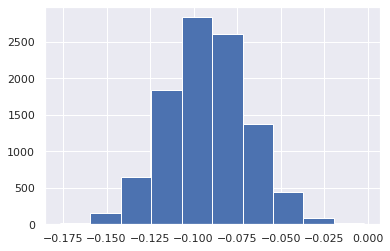

In [15]:
diffs = np.array(diffs)
plt.hist(diffs)

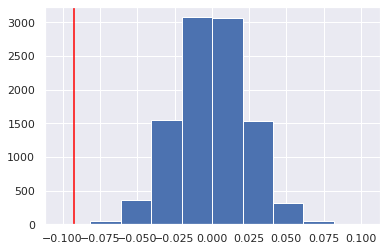

In [16]:
null_vals = np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_vals)
plt.axvline(obs_diff,color='red')

#### So we reject the null
#### The No-show = 1 percent for patients who didn't receive a SMS < the No-show = 1 percent for patients who did receive a SMS
#### So it seems that sending SMSs make patients not to attend the appointment , this is logically unacceptable , so we might be in a need to fix our strategy for sending SMSs ( sending to people who , receiving SMSs to them will increase their attendance )

## Note that we can apply the same idea for every feature , this notebook is for SMS_received only
## You can also check my deep analysis and visualizations for a better understanding of the data , [here](http://www.kaggle.com/mohamedelbeih/no-show-deep-analysis)